# Tarea 10.6

Modifique el código de interpolación de Taylor de segundo orden para que regrese una función interpolante de Hermite. Pruebe su código con algún ejemplo.

In [2]:
#importamos los paquetes necesarios 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Función de ejemplo 
#primero definimos la función
def f(t, y):
    return y - t**2 + 1
#Primera derivada
def df(t, y):
    return f(t,y) - 2*t

In [4]:
#Interpolación de Taylor segundo orden y sus variables
def taylor2(f, df, a, b, yo, N):
    
    #parámetros a usar
    h = (b-a)/N
    t = a
    w = yo
    ts = np.zeros(N+1)
    sol = np.zeros(N+1)
    
    for i in range(N):
        ts[i] = t
        sol[i] = w
        w = w + h*f(t, w) + h*h*df(t, w)/2
        t = t + h
        
    ts[N] = t
    sol[N] = w
    
    return ts, sol

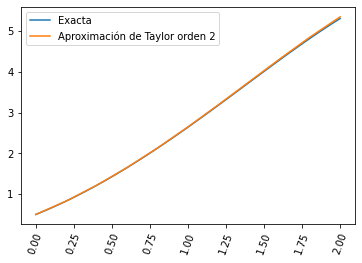

In [18]:
#Gráfica aproximación de Taylor de orden 2
ts = np.linspace(0, 2, 100)
plt.plot(ts, (ts+1)**2 - 0.5*np.exp(ts), label='Exacta') #Función extacta
plt.plot(*taylor2(f, df, 0, 2, 0.5, 10), label='Aproximación de Taylor orden 2') #Aproximación Taylor orden 2
plt.xticks(rotation=70)
plt.legend()
plt.show()

In [6]:
#definimos la Interpolación de Hermite
def interp_hermite(x, puntosx, puntosy, puntosd):
    
    h = puntosx[1] - puntosx[0]
    i = int((x - puntosx[0])/h)
    f1 = (puntosy[i+1] - puntosy[i])/h
    f21 = (f1 - puntosd[i])/h
    f22 = (puntosd[i+1] - f1)/h
    f3 = (f22 - f21)/h
    dx = (x - puntosx[i])
    dx1 = (x - puntosx[i+1])
    
    return puntosy[i] + puntosd[i]*dx + f21*dx*dx + f3*dx*dx*dx1

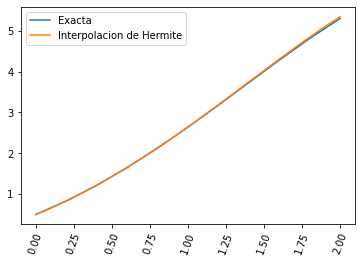

In [15]:
#Gráfica interpolación de Hermite
xs = np.linspace(0, 1.999, 100)
ts = np.linspace(0, 2, 100)
ts, aprox = taylor2(f, df, 0, 2, 0.5, 10)
daprox = [f(ts[i], aprox[i]) for i in range(len(ts))]
interp = [interp_hermite(xi, ts, aprox, daprox) for xi in xs]
plt.plot(ts, (ts+1)**2 - 0.5*np.exp(ts), label='Exacta') #Función exacta
plt.plot(xs, interp, label='Interpolacion de Hermite') #Interpolación de Hermite
plt.xticks(rotation=70)
plt.legend()
plt.show()

In [8]:
#Interpolación de Taylor Modificada
def taylor2modif(f, df, x, a, b, yo, N):
    
    h = (b-a)/N
    t = a
    w = yo
    ts = np.zeros(N+1)
    sol = np.zeros(N+1)
    
    for i in range(N):
        ts[i] = t
        sol[i] = w
        w = w + h*f(t, w) + h*h*df(t, w)/2
        t = t + h
        
    ts[N] = t
    sol[N] = w
    
    #Definición de nuevos parámetros para tener interpolación de Hermite
    puntos = [(ts[i], sol[i]) for i in range(len(ts))]
    puntosd = f(ts,sol)
    
    #Se pide que regrese la interpolación con los nuevos parámetros
    return interp_hermite(x, ts, sol, puntosd)

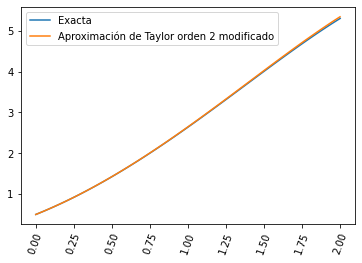

In [14]:
#Gráfica de Taylor modificado de orden 2
ts = np.linspace(0, 2, 100)
xs = np.linspace(0, 1.999, 100)
interp2 = [taylor2modif(f, df, xi, 0, 2, 0.5, 10) for xi in xs]
plt.plot(ts, (ts+1)**2 - 0.5*np.exp(ts), label='Exacta') #Función exacta
plt.plot(xs, interp2, label='Aproximación de Taylor orden 2 modificado') #Taylor modificado orden 2
plt.xticks(rotation=70)
plt.legend()
plt.show()

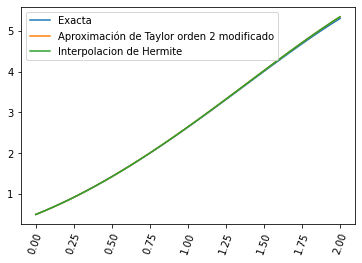

In [13]:
#Gráfica de exacta, interpolación de Hermite y Taylor modificado de orden 2
plt.plot(ts, (ts+1)**2 - 0.5*np.exp(ts), label='Exacta') #Función exacta
plt.plot(xs, interp2, label='Aproximación de Taylor orden 2 modificado') #Taylor modificado orden 2
plt.plot(xs, interp, label='Interpolacion de Hermite') #Interpolación de Hermite
plt.xticks(rotation=70)
plt.legend()
plt.show()

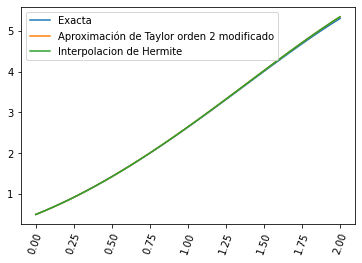

In [12]:
#Gráfica de exacta, interpolación de Hermite y Taylor modificado de orden 2
plt.plot(ts, (ts+1)**2 - 0.5*np.exp(ts), label='Exacta') #Función exacta
plt.plot(xs, interp2, label='Aproximación de Taylor orden 2 modificado') #Taylor modificado orden 2
plt.plot(xs, interp, label='Interpolacion de Hermite') #Interpolación de Hermite
plt.xticks(rotation=70)
plt.legend()
plt.show()

Finalmente podemos concluir que se logró obtener una modificación para el Taylor de segundo orden, de esta forma logramos que esta entrege una interpolación de Hermite

# Calificación: 6.8

Está todo bien, pero los gráficos son poco claros. Para mostrar diferencias entre curvas, es mejor hacer un gráfico del error relativo. Es difícil ver en estas curvas la diferencia entre las diferentes aproximaciones.